In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body_barycentric, get_body, get_moon
import astropy

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
t = Time("2014-09-22 23:22")
loc = EarthLocation.of_site('greenwich') 
with solar_system_ephemeris.set('builtin'):
    jup = get_body('jupiter', t, loc) 

In [52]:
t = Time("2014-09-22 23:22")
t

<Time object: scale='utc' format='iso' value=2014-09-22 23:22:00.000>

In [54]:
time[0]

Timestamp('2016-01-01 00:00:00')

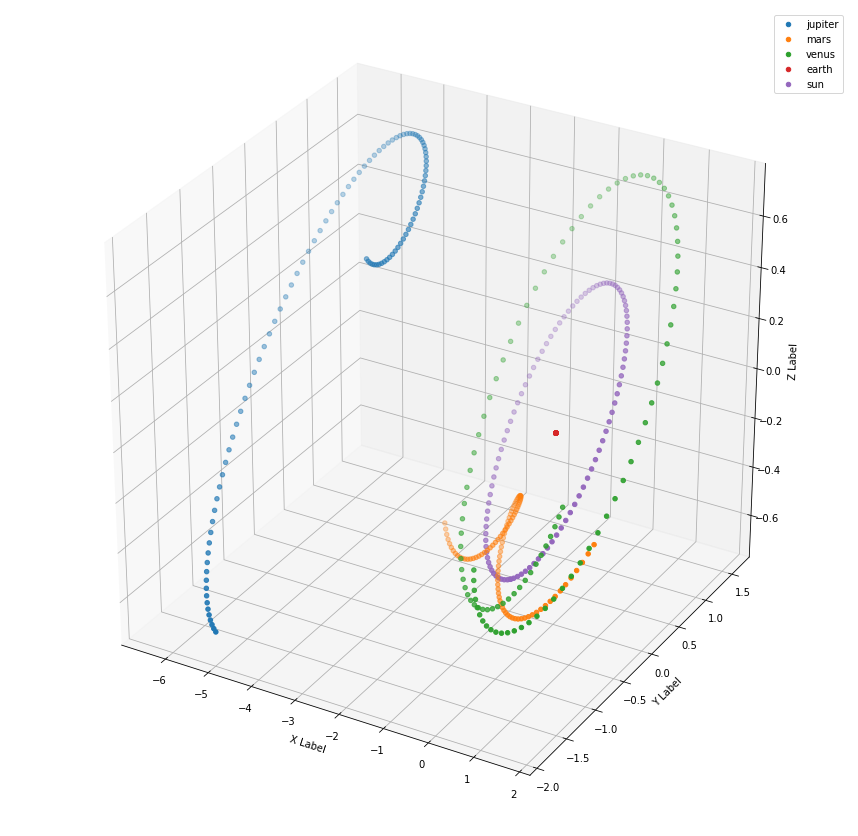

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

n = 100

start = pd.Timestamp('2016-01-01')
end = pd.Timestamp('2017-01-01')
time = np.linspace(start.value, end.value, 100)
time = pd.to_datetime(time)

planets = ['jupiter', 'mars', 'venus', 'earth', 'sun']
planet_ephemeris = {}
for planet in planets:
    planet_ephemeris[planet] = {
        'x_vals': [],
        'y_vals': [],
        'z_vals': []
    }

loc = EarthLocation.of_site('greenwich') 

with solar_system_ephemeris.set('builtin'):
    for planet in planets:
        for t in time:
            ephem = get_body(planet, Time(t), loc)
            planet_ephemeris[planet]['x_vals'].append(ephem.cartesian.xyz.value[0])
            planet_ephemeris[planet]['y_vals'].append(ephem.cartesian.xyz.value[1])
            planet_ephemeris[planet]['z_vals'].append(ephem.cartesian.xyz.value[2])
        
        ax.scatter(planet_ephemeris[planet]['x_vals'],
                   planet_ephemeris[planet]['y_vals'],
                   planet_ephemeris[planet]['z_vals'])

ax.legend(planets)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()